
# Escuela Politécnica Nacional

## Informe de Proyecto II Bimestre Métodos Numéricos

## Integrantes:
1. Ayala Andres.
2. Oñate Ian.
3. Pacheco Pablo.
4. Saeteros Jhonn.

# Marco Teórico

La energía solar que nuestro país recibe es aprovechada principalmente por los paneles solares, que son la base fundamental de nuestro proyecto y la inspiración del mismo, ya que se va a emplear una técnica para optimizar la captación de energía solar mediante el ajuste continuo de la orientación de un panel fotovoltaico en función de la posición aparente del sol.  

En sistemas de seguimiento de dos grados de libertad, el panel puede rotar sobre dos ejes: el **azimutal** (eje horizontal) y el de **elevación** (eje vertical). Esto nos permite mantener una orientación perpendicular a los rayos solares durante todo el día.  

Principalmente consideramos que:  

La posición solar respecto a un punto de la superficie terrestre se describe mediante dos ángulos principales que mencionamos anteriormente. Profundizando, el ángulo de **elevación** es el ángulo entre el horizonte y el sol, mientras que el **azimut** es el ángulo horizontal medido desde el norte geográfico hasta la proyección del sol en el plano horizontal.  

Estos parámetros dependen de:  
* Latitud y longitud de nuestro lugar.  
* Fecha y hora que se determine.  
* Ecuación del tiempo y declinación solar, que describen la variación anual de la posición del sol debido a la inclinación del eje terrestre y la excentricidad de la órbita.  

### Fundamentos conceptuales
Un seguidor solar es un dispositivo mecánico y de control diseñado para orientar paneles fotovoltaicos de manera que su superficie permanezca lo más perpendicular posible a los rayos solares incidentes. El objetivo principal es maximizar la irradiancia captada, incrementando así la generación de energía. La orientación incorrecta reduce significativamente la eficiencia del sistema.
En un sistema de dos grados de libertad (2 DOF), el panel puede girar sobre dos ejes:

Eje azimutal (roll): rotación horizontal alrededor del eje que apunta al norte.

Eje de elevación (pitch): rotación vertical alrededor del eje que apunta al este.

La posición solar respecto a un punto de la superficie terrestre se describe con dos ángulos principales:

Elevación (θ): ángulo entre el horizonte y el sol.

Azimut (α): ángulo horizontal medido desde el norte geográfico hasta la proyección del sol sobre el plano horizontal.

### Cálculo de la posición solar

Actualmente existen diversos modelos matemáticos para determinar la posición de nuestro astro, como el **Solar Position Algorithm (SPA)** del NREL o las fórmulas astronómicas de Meeus. En este proyecto se emplea la librería **PySolar**, que implementa ecuaciones astronómicas precisas para determinar directamente la elevación y el azimut a partir de coordenadas geográficas, fecha y hora.
Estos parámetros dependen de la latitud (φ), longitud (λ), fecha, hora local y fenómenos astronómicos como la ecuación del tiempo y la excentricidad orbital. Con esta información, es posible calcular un vector unitario s que representa la dirección del sol:

### Cálculo

El cálculo básico se puede expresar de la siguiente manera:  

$\theta = \text{get\_altitude}(\varphi, \lambda, t)$  

$\alpha = \text{get\_azimuth}(\varphi, \lambda, t)$  


### Orientación del panel solar

Para orientar el panel correctamente es necesario transformar la posición solar en ángulos mecánicos que controlen los actuadores. Para esto entra en juego:  

- **Pitch** $90^\circ - \theta$: ángulo de elevación del panel solar.  
- **Roll** $\alpha$: ángulo de azimut del panel solar.  

Pitch ajusta la inclinación vertical del panel, mientras que Roll controla la rotación horizontal en función del azimut solar.


### Representación en 3D
Para simular el comportamiento de un seguidor solar se emplean herramientas como Matplotlib 3D y librerías astronómicas (PySolar).
La simulación gráfica del sistema se realiza mediante:  
1. Vectores unitarios que indican la dirección del sol:  
   $s = [\cos(\theta) \cdot \sin(\alpha),\ \cos(\theta) \cdot \cos(\alpha),\ \sin(\theta)]$  
2. Transformaciones geométricas para obtener los vértices del panel a partir del vector normal.  
3. Visualización en **Matplotlib 3D**, mostrando tanto la trayectoria solar como la orientación dinámica del panel.


Es importante el uso de los seguidores solares de dos ejes, pues permite maximizar la irradiancia recibida, aumentando la eficiencia energética respecto a sistemas fijos. En condiciones óptimas, este tipo de sistema puede incrementar la captación de energía entre un **25% y un 40%** anual, dependiendo de la latitud y las condiciones meteorológicas.

### Trabajos relacionados
Kacira et al. (2014): presentaron un seguidor solar dual con dos estrategias de seguimiento, alcanzando hasta 34% de ganancia energética sobre un sistema fijo [1].

Estudios recientes con módulos bifaciales y trackers (2025): reportan que la combinación de módulos bifaciales con sistemas de dos ejes puede superar el 40% de ganancia anual dependiendo de la latitud y condiciones locales [2].

Revisiones de 2023–2024: destacan la tendencia hacia sistemas híbridos y optimización de movimientos para reducir desgaste sin sacrificar eficiencia [3].


## Metodología

El sistema desarrollado es una aplicación en **Python** que simula el movimiento de un panel solar de dos grados de libertad (elevación y azimut) en función de la posición aparente del sol para una ubicación específica.  
El objetivo es calcular los ángulos de orientación (Pitch y Roll) del panel en distintos momentos del día y representarlos visualmente en 3D junto con la trayectoria solar.  

Para lograrlo se implementa:

**Entrada de datos**:
- El usuario ingresa parámetros iniciales mediante una interfaz gráfica (Tkinter):
- Fecha y hora de inicio de la simulación.
- Duración total de la simulación.
- Intervalo de cálculo (minutos o segundos).

**Cálculo astronómico**:
Se emplea la librería PySolar para obtener:

- Elevación solar (θ).
- Azimut solar (α).
- El cálculo se realiza para cada instante definido por el intervalo de simulación.
- Considera correcciones por zona horaria y, de ser necesario, ajuste por ecuación del tiempo.

**Conversión a ángulos mecánicos**:
Los valores astronómicos se transforman a los ángulos del sistema mecánico:
- Pitch = $90^\circ - \theta$ (inclinación vertical).
- Roll =  $\alpha$ (rotación horizontal).
- Conversión a radianes cuando se requiere para cálculos internos.

**Visualización 3D**:
Implementada con matplotlib y mpl_toolkits.mplot3d. Se representan:
- La trayectoria solar a lo largo del día.
- El vector normal del panel.
- La orientación del panel actualizada en tiempo real o de forma animada.
- El entorno 3D permite cambiar ángulos de cámara y escala para un análisis más detallado

**Interfaz gráfica**:
Controles para:
- Iniciar la simulación.
- Pausar y reanudar.
- Reiniciar la animación.
- Navegar hacia adelante o atrás en el tiempo simulado.
- Barra de estado que muestra la hora simulada y valores instantáneos de Pitch y Roll.


# Desarollo Matemático

Para la realización de los cálculos de la posición solar se hizo lo siguiente.
**la Elevación** y el **azimut** se calculan usando:

**a) Cálculo de la posición solar**  
La posición del sol se describe mediante dos parámetros principales: elevación solar (𝜃) y azimut solar (α).
Utilizando la librería PySolar, se emplean las funciones get_altitude y get_azimuth para calcularlos en función de la latitud, longitud y el instante de tiempo:

$\theta = \text{get\_altitude}(\varphi, \lambda, t)$

$\alpha = \text{get\_azimuth}(\varphi, \lambda, t)$

donde:
- $\varphi$ = latitud geográfica  
- $\lambda$ = longitud geográfica  
- $t$ = instante de tiempo local  
La elevación 𝜃 se mide desde el horizonte hacia el sol, mientras que el azimut α se mide horizontalmente desde el norte geográfico en sentido horario.

**b) Conversión a ángulos de control del panel**  
En un sistema de dos grados de libertad, los ángulos de control corresponden a:
- Pitch: inclinación vertical del panel:

$\text{Pitch} = 90^\circ - \theta$

- Roll: rotación horizontal del panel.

$\text{Roll} = \alpha$

**c) Vector unitario solar**  
Para la simulación gráfica en 3D, se determina el vector unitario que apunta desde el origen (panel) hacia la posición del sol. Este vector se expresa en coordenadas cartesianas como:

$\vec{s} =
\begin{bmatrix}
\cos(\theta) \cdot \sin(\alpha) \\
\cos(\theta) \cdot \cos(\alpha) \\
\sin(\theta)
\end{bmatrix}$
donde:

- El primer componente representa la proyección sobre el eje X (este-oeste).
- El segundo componente corresponde al eje Y (norte-sur).
- El tercero es la proyección sobre el eje Z (vertical).

Este vector sirve como referencia para orientar el panel de forma perpendicular a la radiación solar incidente.


# Pseudocódigo

INICIO

Pedir FECHA

Pedir HORA_INICIO

Pedir DURACIÓN

Pedir INTERVALO

lista_TIEMPOS = convertir(DURACIÓN, INTERVALO, HORA_INICIO)

lista_ELEVACION = []

lista_AZIMUT = []

lista_PITCH = []

lista_ROLL = []

PARA cada t en lista_TIEMPOS

    θ = calcularElevacion(t, FECHA, coordenadas)

    α = calcularAzimut(t, FECHA, coordenadas)

    pitch = calcularPitch(θ, α)

    roll = calcularRoll(θ, α)

    AGREGAR θ a lista_ELEVACION

    AGREGAR α a lista_AZIMUT

    AGREGAR pitch a lista_PITCH

    AGREGAR roll a lista_ROLL

FIN PARA

CREAR ventana Tkinter

CREAR gráfica 3D

CREAR animación con FuncAnimation

    Actualizar posición

    Refrescar gráfica

BOTÓN Play/Pausa

BOTÓN Retroceso

BOTÓN Avance

BOTÓN Reinicio

MOSTRAR ventana

FIN


# Diagrama de flujo

El diagrama de flujo presentado describe el proceso completo para la simulación y animación de la trayectoria solar y el movimiento de un panel solar. El procedimiento inicia con la entrada de los parámetros básicos: fecha, hora de inicio, duración del estudio y el intervalo de muestreo. A partir de estos datos, se genera una lista de instantes de tiempo para evaluar la posición solar.

En cada instante, se calcula la elevación y el azimut solar utilizando la librería PySolar, que proporciona valores precisos basados en cálculos astronómicos. Posteriormente, se derivan los ángulos de pitch y roll del panel solar para simular su orientación óptima.

Estos datos se almacenan en listas que permiten la posterior visualización. Luego, se configura una gráfica tridimensional que representa la trayectoria del sol y el movimiento del panel.

Finalmente, se inicia la animación que muestra en tiempo real cómo varían estos valores a lo largo del periodo definido, facilitando el análisis dinámico del comportamiento solar y el ajuste del panel.

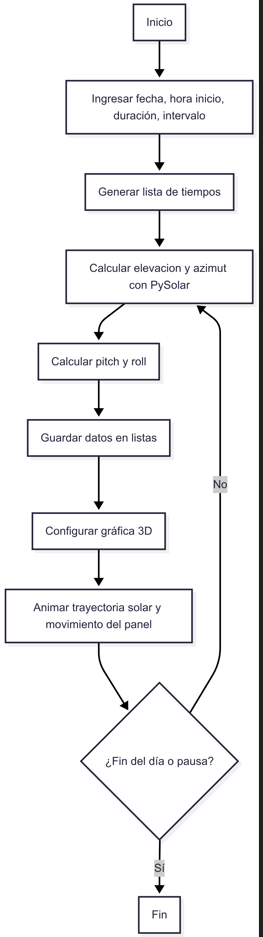

# Librerías empleadas

Para el desarrollo y correcta funcionalidad del proyecto, se emplearon diversas librerías especializadas, clasificadas según su propósito principal:

**Interfaz Gráfica :**

- Tkinter: Biblioteca estándar de Python para la creación de interfaces gráficas de usuario (GUI).

- ttk: Extensión de Tkinter que proporciona widgets con un diseño más moderno y configurable.

- tkcalendar: Complemento para la selección de fechas mediante calendarios interactivos.

**Cálculos Matemáticos y Manejo de Vectores:**

- NumPy: Librería fundamental para el procesamiento numérico y la manipulación eficiente de arrays y vectores.

**Visualización 3D y Animaciones:**

- Matplotlib: Biblioteca para generación de gráficos estáticos, animados e interactivos.

- mpl_toolkits.mplot3d: Extensión de Matplotlib que permite la creación de gráficos en tres dimensiones.

**Cálculo Preciso de la Posición Solar:**

- PySolar: Herramienta especializada para el cálculo de parámetros solares como la elevación y el azimut con alta precisión.

**Manejo de Zonas Horarias:**

- pytz: Librería para la correcta gestión y conversión entre diferentes zonas horarias.

- datetime: Módulo estándar de Python para manipulación y formato de fechas y horas.


# Parámetros configurables por el usuario

El sistema permite al usuario definir una serie de parámetros para personalizar la simulación de la posición solar:
* Fecha Seleccionada mediante un calendario interactivo que facilita la elección del día exacto de simulación.
* Hora de inicio: Ingresada en formato horario de 0 a 23 horas, indicando el momento inicial desde el cual se realizará la simulación.
* Duración: Especifica la cantidad total de horas que abarca la simulación.
* Intervalo: Determina el paso temporal en minutos para el cálculo de cada instante, por ejemplo, intervalos de 15 minutos.
Estos parámetros permiten una configuración flexible y precisa, adaptándose a las necesidades específicas de cada usuario.

# Interfaz Gráfica

La aplicación cuenta con una interfaz gráfica diseñada para facilitar la interacción y visualización de los datos calculados, compuesta por los siguientes elementos principales:
* Panel de configuración: Contiene campos de entrada donde el usuario puede definir los parámetros de la simulación, como fecha, hora, duración e intervalo.
* Panel de ángulos calculados: Muestra en tiempo real los valores de los ángulos obtenidos durante la simulación, incluyendo Elevación, Azimut, Pitch y Roll.
* Área de visualización 3D: Espacio dedicado a la representación tridimensional dinámica, donde se visualizan gráficamente los movimientos y posiciones solares calculadas.
* Barra de controles: Incluye botones para la navegación de la simulación y un deslizador que permite ajustar o recorrer el tiempo de manera interactiva, ademas cuenta con un botón para guardar un reporte con todas las especificaciónes.

# Animación:

- Se emplea matplotlib.animation.FuncAnimation para actualizar dinámicamente la posición del panel y la representación del sol en la visualización 3D.
- Se dibujan arcos de colores que facilitan la comprensión visual de los ángulos de elevación y azimut durante la simulación.
- La animación permite control manual mediante botones y un deslizador, brindando al usuario la posibilidad de pausar, avanzar o retroceder en la trayectoria solar.

# Requerimientos de hardware/software
- Python 3.8 o superior.
- Entorno compatible con Tkinter y Matplotlib 3D para la correcta ejecución de la interfaz y visualización.
- No se requiere conexión a internet, ya que todos los cálculos se realizan localmente en el equipo.

## Recomendaciones para usar este proyecto
1. Instalar Python junto con las librerías indicadas en el archivo requirements.txt.

2. Configurar adecuadamente la latitud, longitud y zona horaria de acuerdo con la ubicación geográfica deseada para la simulación.

3. Ejecutar el archivo principal denominado "seguidor_solar.py".

4. Realizar pruebas con diferentes fechas, horas e intervalos para observar cómo varía la trayectoria solar.

5. Verificar que los ángulos calculados se representen correctamente en pantalla antes de proceder a guardar resultados o capturas.


# Instalación de dependencias

pip install -r requirements.txt

# Experimentación

Entrando a la fase de experimentación podemos decir que nuestro objetivo primero fue evaluar la precisión, estabilidad y rendimiento del simulador de nuestro seguidor solar, entonces nos pusimos los siguientes objetivos:
1. Exactitud de los ángulos solares "elevación y azimut" y de control "Pitch y Roll".

### Empleamos la siguiente configuración geográfica
latitude = -0.2105367

longitude = -78.491614

timezone_local = timezone("America/Guayaquil")

### Configuraciones iniciales de nuestro programa
Podemos interactuar con los datos como:
1. Fecha: Un calendario que podemos interactuar a nuestra conveniencia.
2. Hora inicio: Desde qué momento queremos simular.
3. Duración: Cuántas horas va a durar la simulación.
4. Invervalo: El número de minutos que va a recorrer por animación.

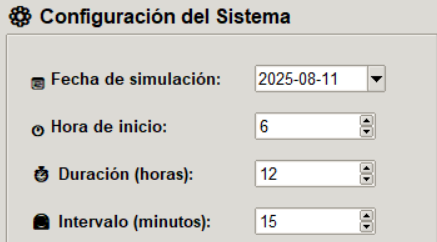

Con los parámetros ya definidos podemos activar nuestro botón de **Calcular y Animar** además de que podremos ver cómo los ángulos como "Elevación, Azimut, Pitch y Roll" van cambiando a lo largo de cada fotograma.

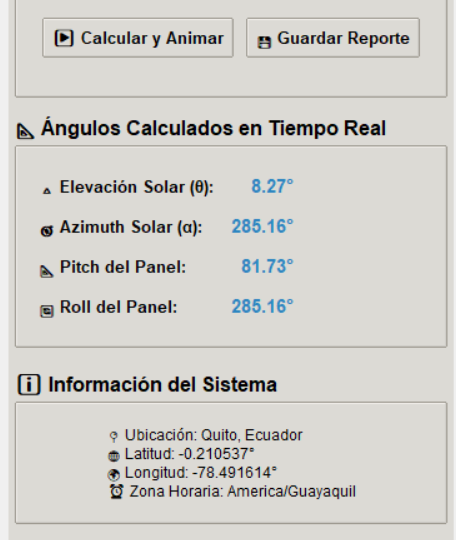

### Programa inicial

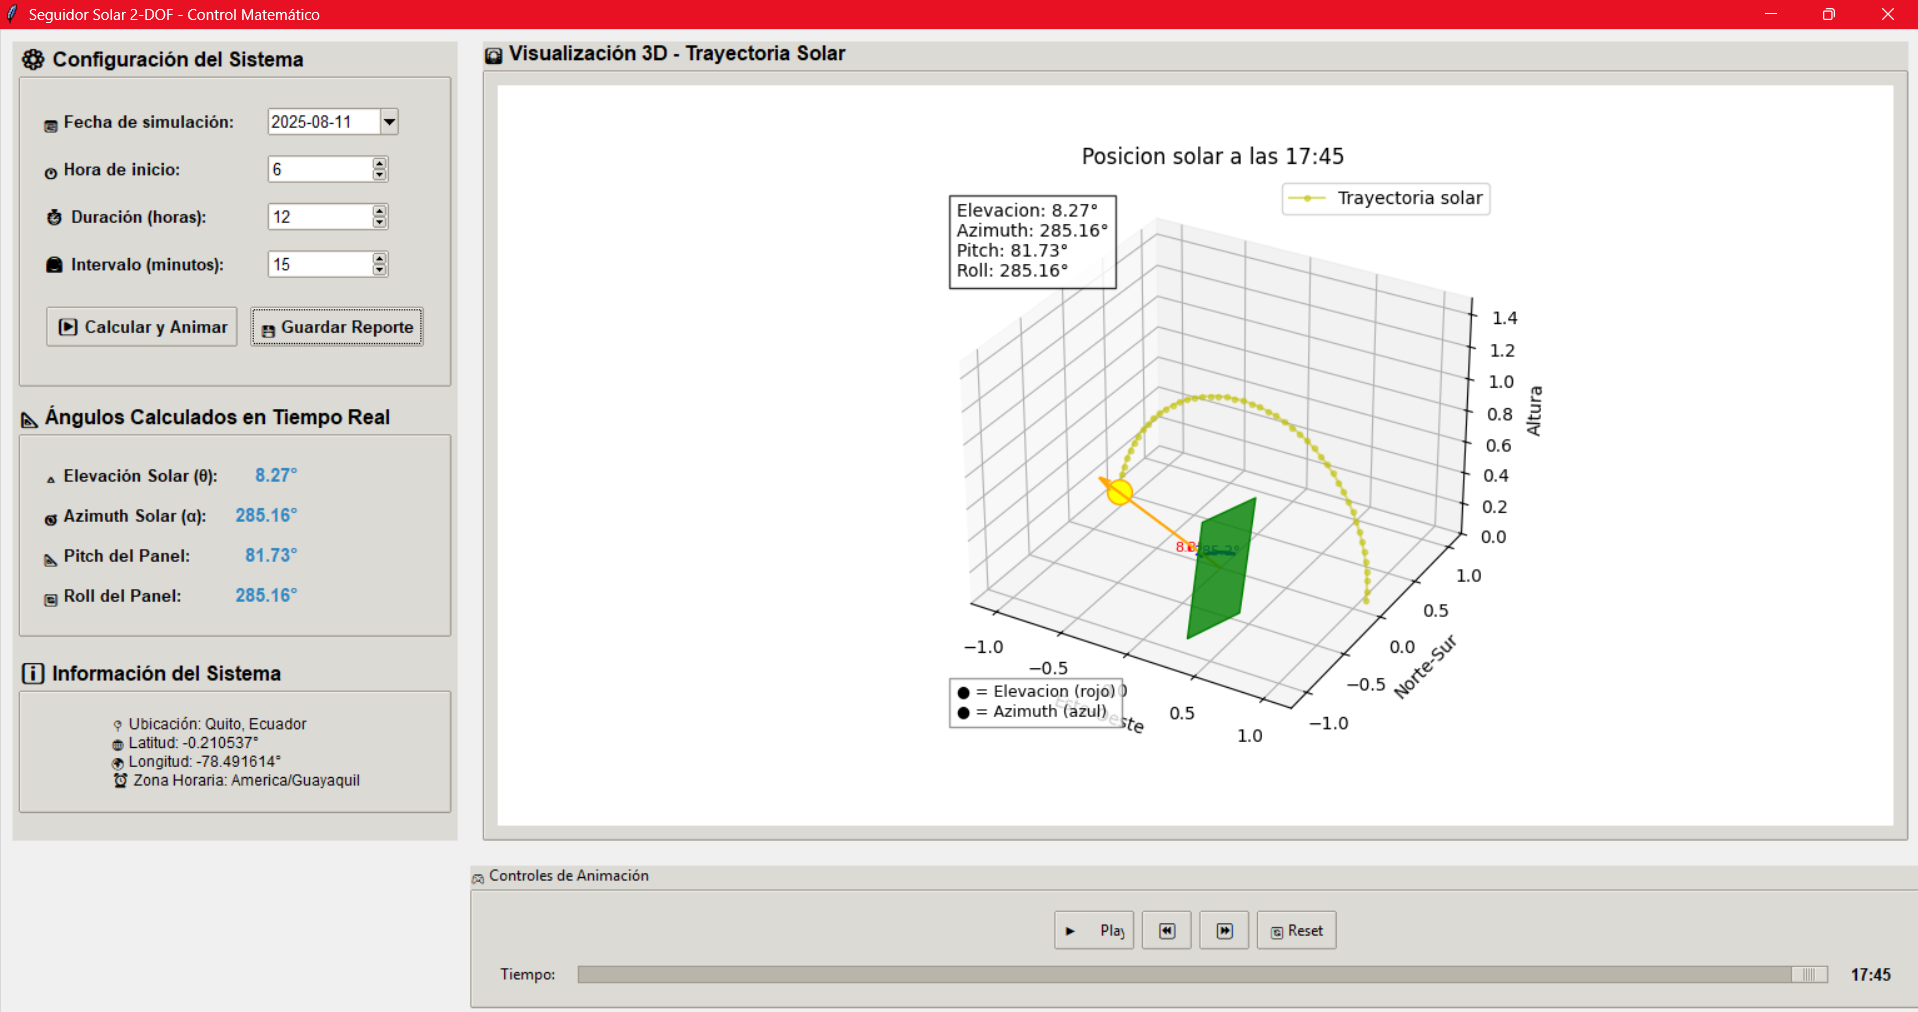

### Acción: Calcular y Animar

Al momento de empezar la animación en 3D, podremos interactuar con los botones de **Play, Pause, Adelantar, Retroceder y Reiniciar** para controlar la animación.

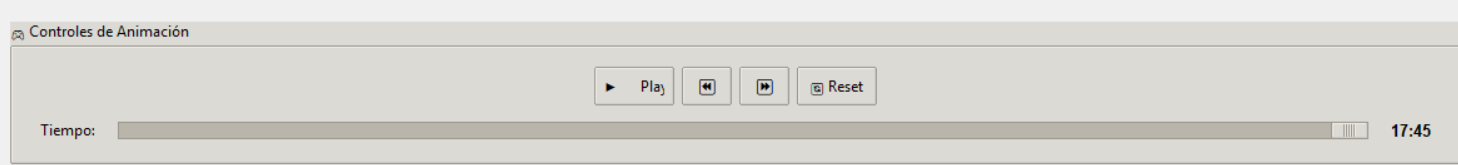

### Animación en accción.
Cuando nuestro programa empieza con su animación, podemos notar que los ángulos ya mencionados van cambiando especialmente veremos que los ángulos **"Elevación en rojo y Azimuth en azul"** están presentes en nuestra animación y van variando según cómo el sol y el panel se vayan moviendo cumpliendo con la condición de que el panel sea perpendicular a nuestro astro solar.

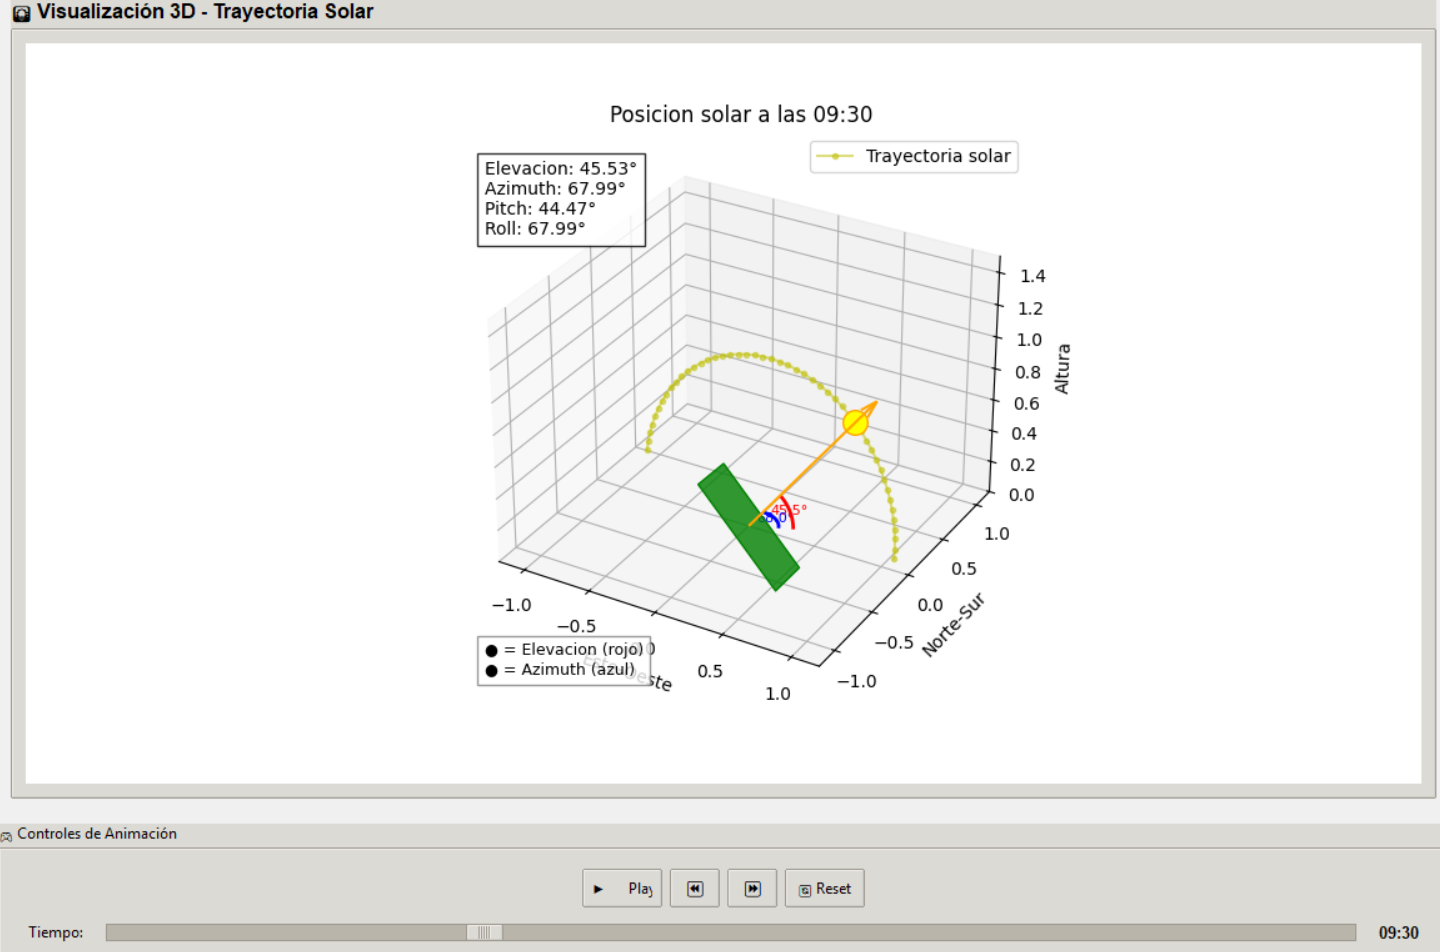

Acá se puede notar a más precisión que es un ángulo recto.

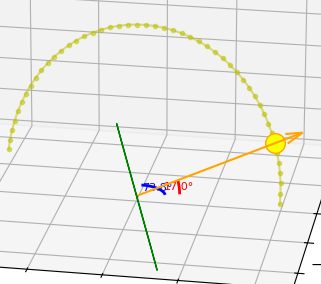

### Prueba 1) 1 de Mayo de 2025.
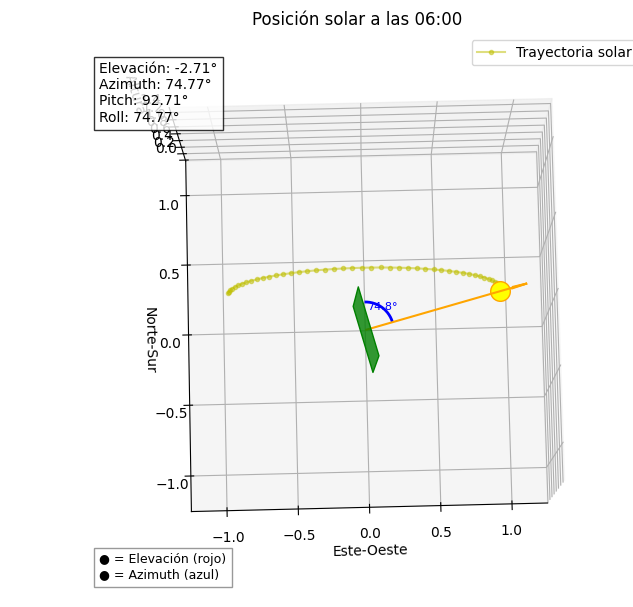
### Prueba 2) 17 de Septiembre de 2025.
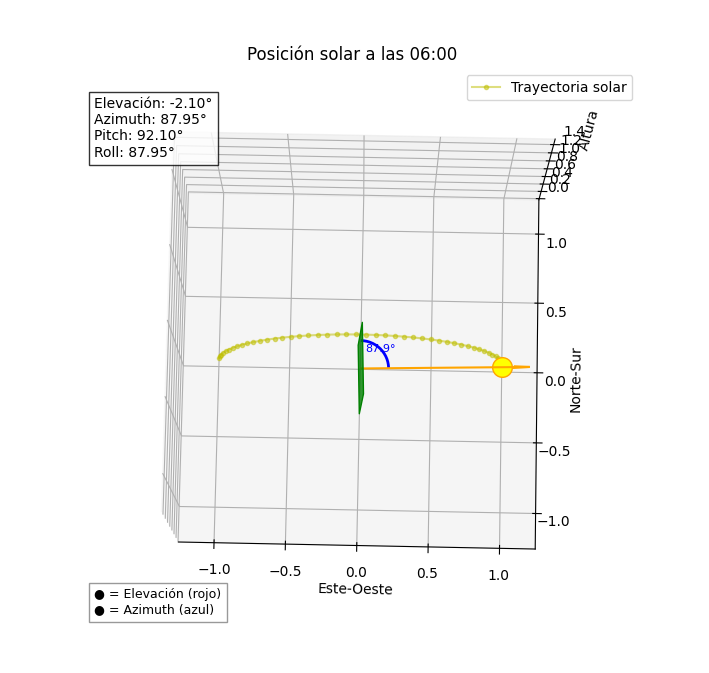
### Prueba 3) 1 de Diciembre de 2025.
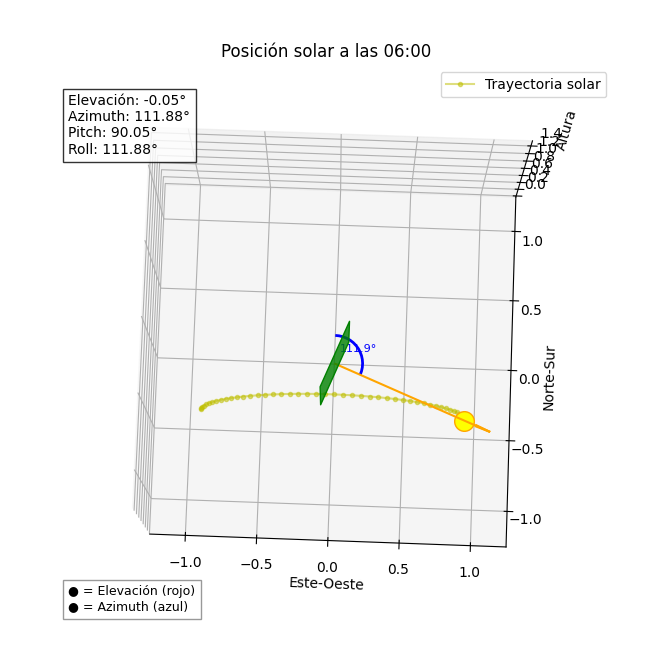




# Botón de guardar reporte

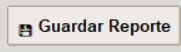

Al presionar el botón de guardar reporte
automaticamente tendremos los siguientes datos:

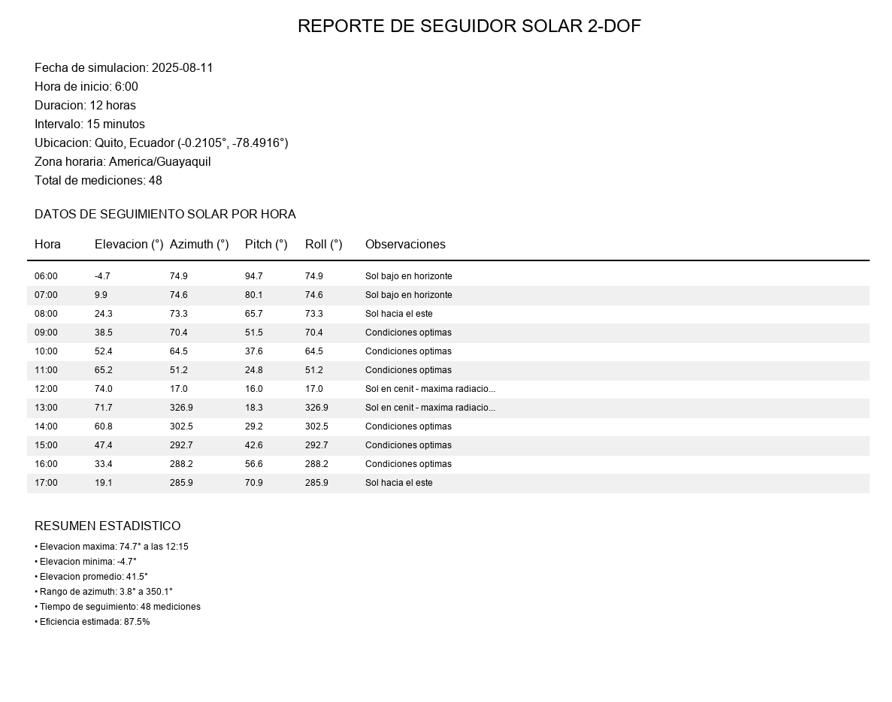

# Conclusiones y Recomendaciones

1. Un seguidor solar de dos ejes requiere exactamente dos ángulos de control para orientar el panel: uno vertical y uno horizontal. En nuestra implementación se mapean como Pitch (inclinación) y Roll (giro). Estos se obtienen directamente de la posición solar: Pitch = 90° − elevación y Roll = azimut.
2. La mayor fuente de errores observados no es numérica sino de configuración: zona horaria, uso de UTC y signos de latitud/longitud. Documentar y automatizar estas conversiones reduce fallas más que cualquier refinamiento matemático.
3. La visualización 3D con arcos y etiquetas aporta valor didáctico: acelera la detección de inconsistencias (por ejemplo, azimut “mirando al Este” cuando debería estar cerca del Norte en el ecuador al mediodía).
4. La herramienta resultó útil como “laboratorio virtual”: permite experimentar con fechas (solsticios/equinoccios) y ciudades y observar, sin cálculos manuales, cómo cambian elevación y azimut por estacionalidad y latitud.

# Referencias Biliográficas

[1] “Solar tracking systems: Advancements, challenges, and future,” Renewable and Sustainable Energy Reviews, 2024. [Online]. Available: https://www.sciencedirect.com

[2] A. Kacira et al., “A multipurpose dual-axis solar tracker with two tracking strategies,” Renewable Energy, vol. 29, no. 11, pp. 1675–1686, 2014. [Online]. Available: https://www.sciencedirect.com

[3] “Dependability Assessment of a Dual-Axis Solar Tracking Prototype,” MDPI Energies, 2023. [Online]. Available: https://www.mdpi.com

[4] G. G. Bennett, “The calculation of astronomical refraction in marine navigation,” Journal of Navigation, vol. 35, no. 2, pp. 255–259, 1982. (Refracción, si se considera).

[5] IANA, “Time Zone Database (tzdb).” (Convenciones de zonas horarias utilizadas por pytz).

[6] R. Blanco-Muriel, D. C. Alarcón-Padilla, T. López-Moratalla, and M. Lara-Coira, “Computing the solar vector,” Solar Energy, vol. 70, no. 5, pp. 431–441, 2001.
